In [1]:
#Modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import graphviz
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

In [2]:
dem = pd.read_csv('demographic.csv')

display(dem.head())

print(dem.shape, "\n")
print(dem.info(), "\n")
print(dem.describe())

dem.columns

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Toy Story,Animation; Comedy; Family,81.0,7.7,5415.0,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,Adventure; Fantasy; Family,104.0,6.9,2413.0,1995,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,Romance; Comedy,101.0,6.5,92.0,1995,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,Waiting to Exhale,Comedy; Drama; Romance,127.0,6.1,34.0,1995,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,Father of the Bride Part II,Comedy,106.0,5.7,173.0,1995,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(45130, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45130 entries, 0 to 45129
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            45130 non-null  object 
 1   genres           42816 non-null  object 
 2   runtime          45130 non-null  float64
 3   vote_average     45130 non-null  float64
 4   vote_count       45130 non-null  float64
 5   release_year     45130 non-null  int64  
 6   Action           45130 non-null  int64  
 7   Adventure        45130 non-null  int64  
 8   Animation        45130 non-null  int64  
 9   Comedy           45130 non-null  int64  
 10  Crime            45130 non-null  int64  
 11  Documentary      45130 non-null  int64  
 12  Drama            45130 non-null  int64  
 13  Family           45130 non-null  int64  
 14  Fantasy          45130 non-null  int64  
 15  Foreign          45130 non-null  int64  
 16  History          45130 non-null  int64  
 17

Index(['title', 'genres', 'runtime', 'vote_average', 'vote_count',
       'release_year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

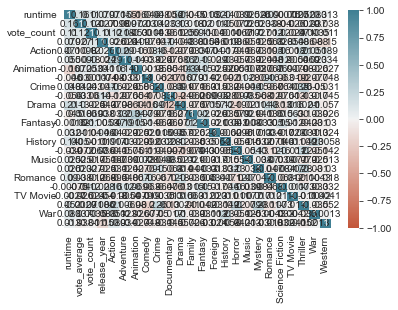

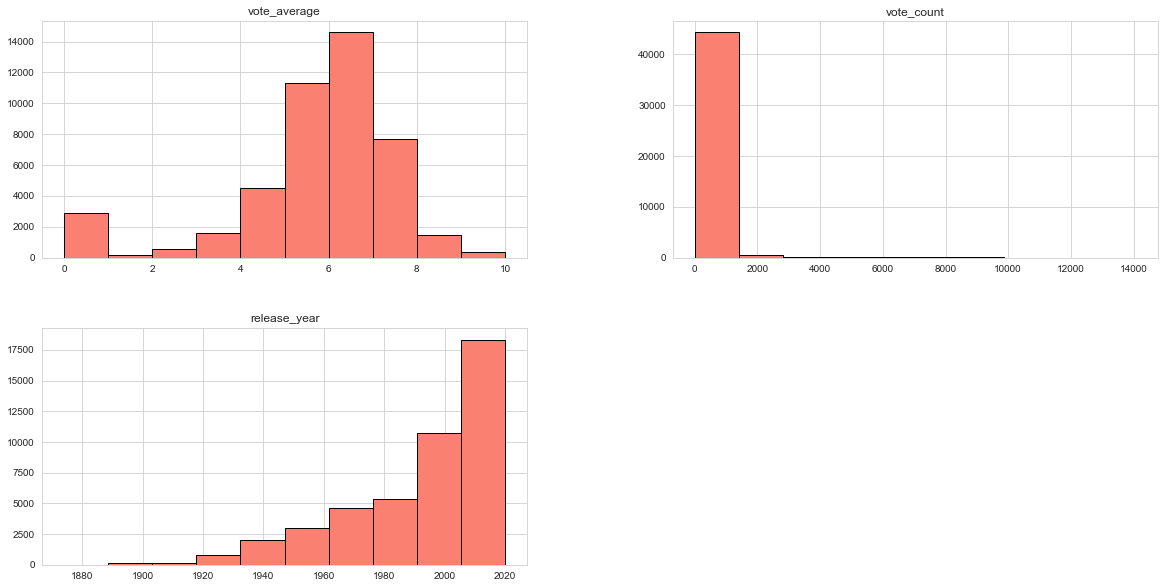

In [3]:
sns.heatmap(dem.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.show()

numbers = ['vote_average','vote_count','release_year']

dem.loc[:,numbers].hist(color='salmon', figsize=(20,10), edgecolor='black', bins=10)
plt.show()

release_year: 
 2014    1956
2015    1885
2013    1873
2012    1714
2011    1663
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: release_year, Length: 135, dtype: int64


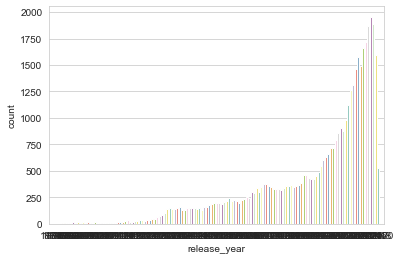

In [4]:
print("release_year:", '\n', dem['release_year'].value_counts())

sns.countplot(x='release_year', data=dem, palette='Set3')
plt.show()

<AxesSubplot:xlabel='Action', ylabel='release_year'>

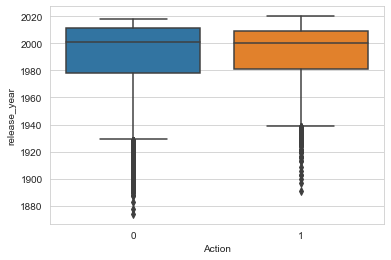

In [5]:
sns.boxplot(x=dem["Action"],y=dem["release_year"])

<AxesSubplot:xlabel='Action', ylabel='runtime'>

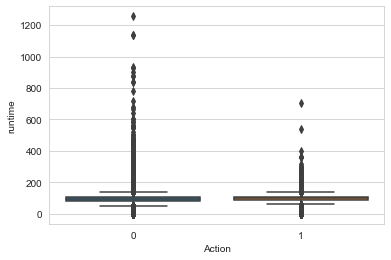

In [6]:
sns.boxplot(x=dem["Action"],y=dem["runtime"])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(dem.drop(columns=['title','genres'], axis=1))

scaled_features = pd.DataFrame(scaler.transform(dem.drop(columns=['title','genres'], axis=1)),columns=dem.columns[2:])

scaled_features.head()

,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,-0.343804,1.086553,10.759013,0.130676,-0.413254,-0.289416,4.733675,1.564166,-0.324397,-0.308032,...,-0.17853,-0.339658,-0.191533,-0.240211,-0.418312,-0.268417,-0.130526,-0.450326,-0.17358,-0.153735
1,0.256081,0.665721,4.669908,0.130676,-0.413254,3.455235,-0.211252,-0.639318,-0.324397,-0.308032,...,-0.17853,-0.339658,-0.191533,-0.240211,-0.418312,-0.268417,-0.130526,-0.450326,-0.17358,-0.153735
2,0.177835,0.455306,-0.037892,0.130676,-0.413254,-0.289416,-0.211252,1.564166,-0.324397,-0.308032,...,-0.17853,-0.339658,-0.191533,-0.240211,2.390559,-0.268417,-0.130526,-0.450326,-0.17358,-0.153735
3,0.855967,0.244890,-0.155536,0.130676,-0.413254,-0.289416,-0.211252,1.564166,-0.324397,-0.308032,...,-0.17853,-0.339658,-0.191533,-0.240211,2.390559,-0.268417,-0.130526,-0.450326,-0.17358,-0.153735
4,0.308245,0.034474,0.126405,0.130676,-0.413254,-0.289416,-0.211252,1.564166,-0.324397,-0.308032,...,-0.17853,-0.339658,-0.191533,-0.240211,-0.418312,-0.268417,-0.130526,-0.450326,-0.17358,-0.153735


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, dem['Action'], random_state=0)

In [10]:
#knn

error_rate = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train,Y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(predict != Y_test))


Text(0, 0.5, 'Error Rate')

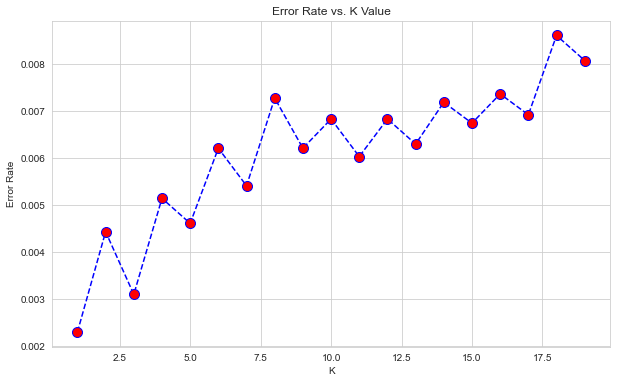

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
# K = 18
knn = KNeighborsClassifier(n_neighbors=18, n_jobs=-1)
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

print('K = 18')
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

K = 18
[[9630    7]
 [  90 1556]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9637
           1       1.00      0.95      0.97      1646

    accuracy                           0.99     11283
   macro avg       0.99      0.97      0.98     11283
weighted avg       0.99      0.99      0.99     11283



In [13]:
#desicion tree

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, Y_train)
prediction = tree.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [14]:
class_names = dem['genres']
dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=class_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")

In [15]:
#svm

model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(confusion_matrix(Y_test, predictions))
print('\n')
print(classification_report(Y_test, prediction))

[[9636    1]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [16]:
#SVM Gridsearch

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

grid.best_params_

grid.best_estimator_

grid_predictions = grid.predict(X_test)
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=  51.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=  54.4s


KeyboardInterrupt: 

In [17]:
# AdaBoost
adaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBoost.fit(X_train, Y_train)

prediction = adaBoost.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [18]:
#AdaBoost Gridsearch
param_dist = {
 'n_estimators': [100, 200, 300, 400],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
gridAdaBoost = GridSearchCV(AdaBoostClassifier(), param_dist, n_jobs=-1)
gridAdaBoost.fit(X_train, Y_train)

gridAdaBoost.best_params_

prediction = gridAdaBoost.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [19]:
#Random Forest

randomForest = RandomForestClassifier(random_state=0)
randomForest.fit(X_train, Y_train)

prediction = randomForest.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [20]:
#Random Forest Gridsearch

param_dist = {
 'criterion': ["entropy","gini"],
 'max_depth' : [2, 5, 10, 20, None],
 }

gridrf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1)
gridrf.fit(X_train, Y_train)

gridrf.best_params_

prediction = gridrf.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [21]:
#Gradient Boost

gBoost = GradientBoostingClassifier(random_state=0)
gBoost.fit(X_train, Y_train)

prediction = adaBoost.predict(X_test)

print('\n')
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))



[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283



In [22]:
#Gradient Boost Gridsearch

param_dist = {
 'loss': ['deviance', 'exponential'],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
gridgb = GridSearchCV(GradientBoostingClassifier(), param_dist, n_jobs=-1)
gridgb.fit(X_train, Y_train)

gridgb.best_params_

prediction = gridgb.predict(X_test)
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

[[9637    0]
 [   0 1646]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9637
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     11283
   macro avg       1.00      1.00      1.00     11283
weighted avg       1.00      1.00      1.00     11283

